In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
#https://www.kaggle.com/nidakapmaz/unidentified-flying-object

In [144]:
df = pd.read_csv("scrubbed.csv",low_memory=False,dtype='str')

In [145]:
df.head(2)

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
0,10/10/1949 20:30,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,4/27/2004,29.8830556,-97.9411111
1,10/10/1949 21:00,lackland afb,tx,NaN,light,7200,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,12/16/2005,29.38421,-98.581082


In [4]:
# comments column contains unmeaningfull words. 
# cleaning character caused unmeaningful words
# Different encoding types were tried. Result negative


In [146]:
df.comments = df.comments.str.replace("&#44","").str.replace("&amp","")

In [147]:
df.comments

0        This event took place in early fall around 194...
1        1949 Lackland AFB TX.  Lights racing across th...
2          Green/Orange circular disc over Chester England
3        My older brother and twin sister were leaving ...
4        AS a Marine 1st Lt. flying an FJ4B fighter/att...
                               ...                        
80327    Round from the distance/slowly changing colors...
80328    Boise ID spherical 20 min 10 red lights seen b...
80329                                             Napa UFO
80330    Saw a five gold lit cicular craft moving fastl...
80331    2 witnesses 2  miles apart Red ; White Elongat...
Name: comments, Length: 80332, dtype: object

In [7]:
df.shape

(80332, 11)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80332 entries, 0 to 80331
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   datetime              80332 non-null  object 
 1   city                  80332 non-null  object 
 2   state                 74535 non-null  object 
 3   country               70662 non-null  object 
 4   shape                 78400 non-null  object 
 5   duration (seconds)    80332 non-null  object 
 6   duration (hours/min)  80332 non-null  object 
 7   comments              80317 non-null  object 
 8   date posted           80332 non-null  object 
 9   latitude              80332 non-null  object 
 10  longitude             80332 non-null  float64
dtypes: float64(1), object(10)
memory usage: 6.7+ MB


In [9]:
df.isnull().sum()
# number of Null 

datetime                   0
city                       0
state                   5797
country                 9670
shape                   1932
duration (seconds)         0
duration (hours/min)       0
comments                  15
date posted                0
latitude                   0
longitude                  0
dtype: int64

In [167]:
def missing (df):
    missing_number = df.isnull().sum().sort_values(ascending=False)
    missing_percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)*100
    missing_percent = round(missing_percent,2)
    missing_values = pd.concat([missing_number, missing_percent], axis=1, keys=['Missing_Number', 'Missing_Percent'])
    return missing_values

In [165]:
(df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)*100

country                 12.037544
state                    7.216302
shape                    2.405019
comments                 0.018673
longitude                0.000000
latitude                 0.000000
date posted              0.000000
duration (hours/min)     0.000000
duration (seconds)       0.000000
city                     0.000000
datetime                 0.000000
dtype: float64

In [168]:
missing(df)

,Missing_Number,Missing_Percent
country,9670,12.04
state,5797,7.22
shape,1932,2.41
comments,15,0.02
longitude,0,0.00
latitude,0,0.00
date posted,0,0.00
duration (hours/min),0,0.00
duration (seconds),0,0.00
city,0,0.00


In [169]:
df.drop_duplicates(inplace=True)
print(df.shape)

(80331, 11)


In [176]:
df.dropna(thresh=1)

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
0,10/10/1949 20:30,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,4/27/2004,29.8830556,-97.9411111
1,10/10/1949 21:00,lackland afb,tx,NaN,light,7200,1-2 hrs,1949 Lackland AFB TX. Lights racing across th...,12/16/2005,29.38421,-98.581082
2,10/10/1955 17:00,chester (uk/england),NaN,gb,circle,20,20 seconds,Green/Orange circular disc over Chester England,1/21/2008,53.2,-2.916667
3,10/10/1956 21:00,edna,tx,us,circle,20,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.9783333,-96.6458333
4,10/10/1960 20:00,kaneohe,hi,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.4180556,-157.8036111
...,...,...,...,...,...,...,...,...,...,...,...
80327,9/9/2013 21:15,nashville,tn,us,light,600,10 minutes,Round from the distance/slowly changing colors...,9/30/2013,36.1658333,-86.7844444
80328,9/9/2013 22:00,boise,id,us,circle,1200,20 minutes,Boise ID spherical 20 min 10 red lights seen b...,9/30/2013,43.6136111,-116.2025000
80329,9/9/2013 22:00,napa,ca,us,other,1200,hour,Napa UFO,9/30/2013,38.2972222,-122.2844444
80330,9/9/2013 22:20,vienna,va,us,circle,5,5 seconds,Saw a five gold lit cicular craft moving fastl...,9/30/2013,38.9011111,-77.2655556


In [34]:
# let's checkthe data column by columns

In [177]:
df.shape

(80329, 11)

In [42]:
column_list = df.columns.to_list()
column_list

['datetime',
 'city',
 'state',
 'country',
 'shape',
 'duration (seconds)',
 'duration (hours/min)',
 'comments',
 'date posted',
 'latitude',
 'longitude ',
 'date',
 'time']

# datetime

In [44]:
df[['datetime']]

,datetime
0,1949-10-10 20:30:00
1,1949-10-10 21:00:00
2,1955-10-10 17:00:00
3,1956-10-10 21:00:00
4,1960-10-10 20:00:00
...,...
80327,2013-09-09 21:15:00
80328,2013-09-09 22:00:00
80329,2013-09-09 22:00:00
80330,2013-09-09 22:20:00


In [12]:
df.datetime.sample(5)

39425    4/27/2013 21:58
12179    11/2/2012 22:00
44554    5/27/1997 00:35
72250     8/7/2013 20:30
17459    1/21/2006 17:45
Name: datetime, dtype: object

In [13]:
# df.datetime = pd.to_datetime(df.datetime)
# the code written above give error because of time format.
# time format can not be 24:00 so time need to be edited

In [14]:
df.datetime = df.datetime.map(lambda x: "00:00" if "24:00" in x else x )
# time format replaced from 24:00 to 00:00

In [15]:
df.datetime = pd.to_datetime(df.datetime)

In [16]:
df.datetime.dtype

dtype('<M8[ns]')

In [17]:
# split date and time

In [18]:
df["date"] = df.datetime.dt.date

In [19]:
df["time"] = df.datetime.dt.time

In [20]:
df[["date","time"]]

,date,time
0,1949-10-10,20:30:00
1,1949-10-10,21:00:00
2,1955-10-10,17:00:00
3,1956-10-10,21:00:00
4,1960-10-10,20:00:00
...,...,...
80327,2013-09-09,21:15:00
80328,2013-09-09,22:00:00
80329,2013-09-09,22:00:00
80330,2013-09-09,22:20:00


In [22]:
df.datetime.dt.year.value_counts()
# UFO sightings by year 


2012    7308
2013    6992
2011    5077
2008    4777
2009    4508
        ... 
1930       1
1933       1
1934       1
1941       1
1920       1
Name: datetime, Length: 88, dtype: int64

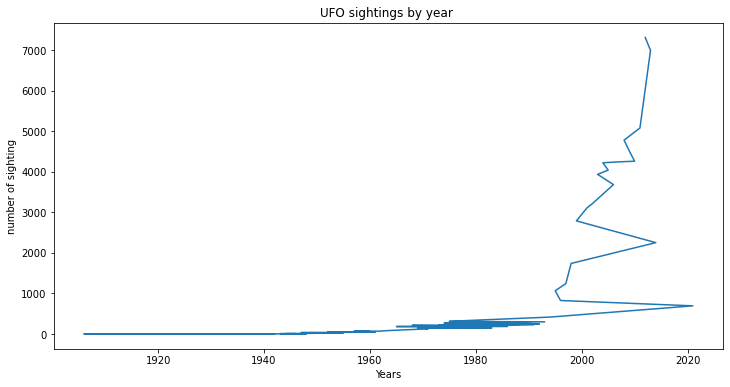

In [49]:
plt.figure(figsize=(12,6))
plt.title("UFO sightings by year ")
plt.xlabel("Years")
plt.ylabel("number of sighting")
df.datetime.dt.year.value_counts().plot(kind = "line");




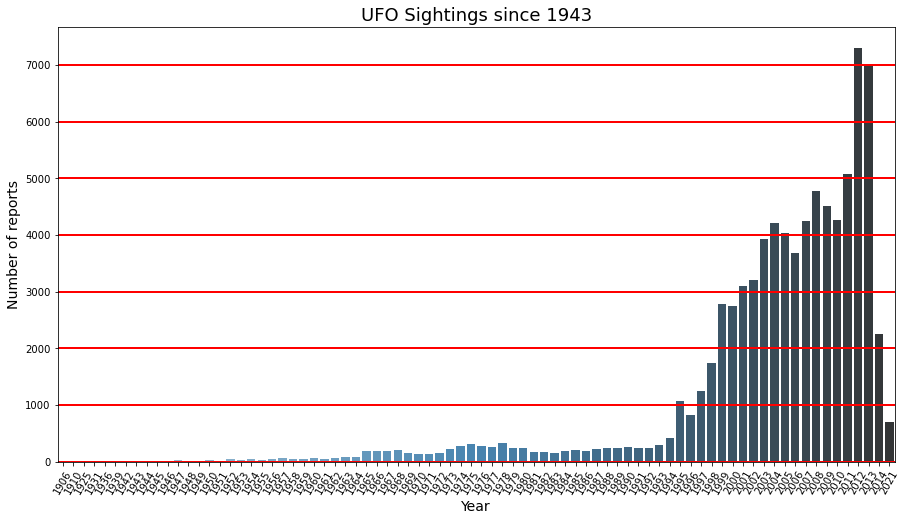

In [24]:

years_data = df.datetime.dt.year.value_counts()
years_index = years_data.index  
years_values = years_data.values
plt.figure(figsize=(15,8))
plt.grid(color='r', linestyle='-', linewidth=2)
plt.xticks(rotation = 60)
plt.title('UFO Sightings since 1943', fontsize=18)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Number of reports", fontsize=14)
years_plot = sns.barplot(x=years_index[:80],y=years_values[:80], palette = "Blues_d")



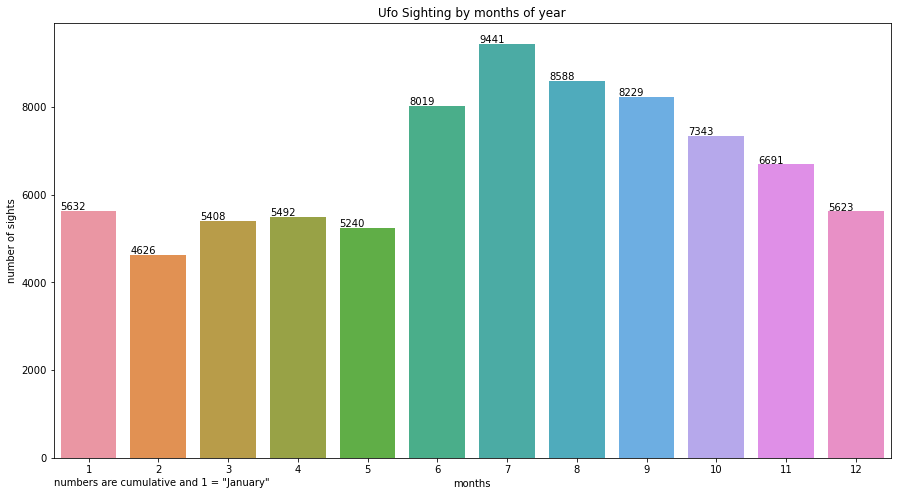

In [25]:


plt.figure(figsize=(15,8))
plt.title("Ufo Sighting by months of year")
ax = sns.countplot(df.datetime.dt.month)
ax.set(xlabel='months', ylabel='number of sights')

plt.annotate('numbers are cumulative and 1 = "January"', (0,0), (0, -20), xycoords='axes fraction', textcoords='offset points', va='top')

for p in ax.patches:
    ax.annotate( str(p.get_height()),  (p.get_x(), p.get_height()+20));

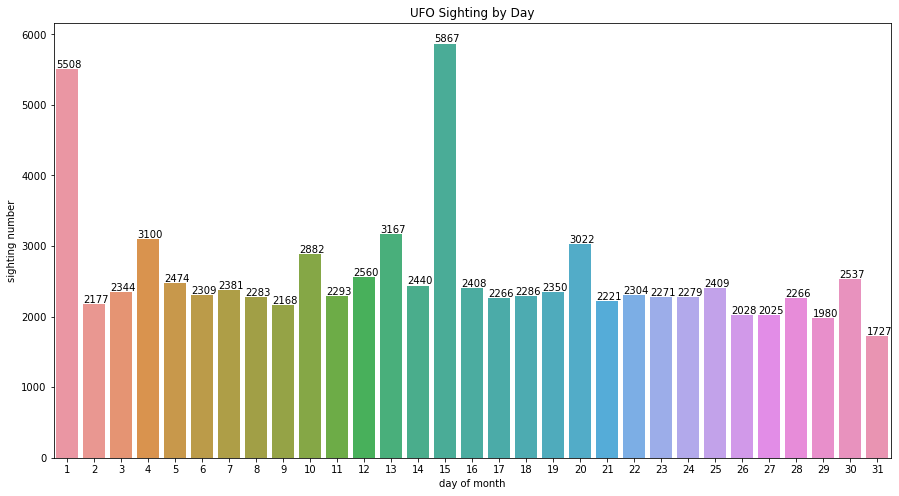

In [26]:
plt.figure(figsize=(15,8))

ax = sns.countplot(df.datetime.dt.day)
plt.title("UFO Sighting by Day")
ax.set(xlabel = "day of month", ylabel = "sighting number")
for p in ax.patches:
    ax.annotate( str(p.get_height()),  (p.get_x(), p.get_height()+20));


# country & city

In [54]:
df[["country","city"]]

,country,city
0,us,san marcos
1,NaN,lackland afb
2,gb,chester (uk/england)
3,us,edna
4,us,kaneohe
...,...,...
80327,us,nashville
80328,us,boise
80329,us,napa
80330,us,vienna


In [58]:
print("Country: ",df.country.unique())
print("city: ", df.city.unique())

Country:  ['us' nan 'gb' 'ca' 'au' 'de']
city:  ['san marcos' 'lackland afb' 'chester (uk/england)' ... 'calmar (canada)'
 'aleksandrow (poland)' 'hamstead (hollyridge)']


In [59]:
df.country.value_counts(dropna=False)

us     65114
NaN     9670
ca      2999
gb      1905
au       538
de       105
Name: country, dtype: int64

In [104]:
# None values in country column
df[df.country.isnull()].head()

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
1,10/10/1949 21:00,lackland afb,tx,NaN,light,7200,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,12/16/2005,29.38421,-98.581082
18,10/10/1973 23:00,bermuda nas,NaN,NaN,light,20,20 sec.,saw fast moving blip on the radar scope thin w...,1/11/2002,32.364167,-64.678611
29,10/10/1979 22:00,saddle lake (canada),ab,NaN,triangle,270,4.5 or more min.,Lights far above&#44 that glance; then flee f...,1/19/2005,53.970571,-111.689885
35,10/10/1982 07:00,gisborne (new zealand),NaN,NaN,disk,120,2min,gisborne nz 1982 wainui beach to sponge bay,1/11/2002,-38.662334,178.017649
40,10/10/1986 20:00,holmes/pawling,ny,NaN,chevron,180,3 minutes,Football Field Sized Chevron with bright white...,10/8/2007,41.523427,-73.646795


In [110]:
df[df.city.isnull()]

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude


In [67]:
df.city.value_counts(dropna=False)

seattle               525
phoenix               454
portland              374
las vegas             368
los angeles           353
                     ... 
mellieha                1
shade gap               1
bering sea              1
klaksvik (finland)      1
orangeville             1
Name: city, Length: 19900, dtype: int64

In [65]:
# Countries with the most UFO sightings 


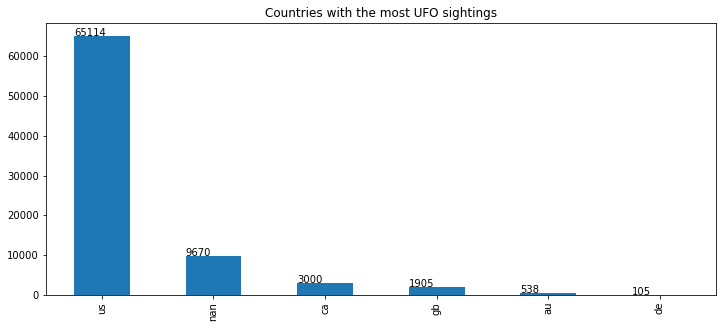

In [111]:
plt.figure(figsize=(12,5))
plt.title("Countries with the most UFO sightings")
ax = df.country.value_counts(dropna=False).plot(kind = "bar")
for p in ax.patches:
    ax.annotate( str(p.get_height()),  (p.get_x(), p.get_height()+20));

In [115]:
df.state.value_counts(dropna = False)

ca     9655
NaN    5797
wa     4268
fl     4200
tx     3677
       ... 
nf       25
nt       20
pe       17
yt       13
yk        7
Name: state, Length: 68, dtype: int64

# Shape

In [121]:
df['shape'].value_counts(dropna=False)

light        16565
triangle      7865
circle        7608
fireball      6208
other         5649
unknown       5584
sphere        5387
disk          5213
oval          3733
formation     2457
cigar         2057
changing      1962
NaN           1932
flash         1328
rectangle     1297
cylinder      1283
diamond       1178
chevron        952
egg            759
teardrop       750
cone           316
cross          233
delta            7
crescent         2
round            2
changed          1
dome             1
flare            1
pyramid          1
hexagon          1
Name: shape, dtype: int64

In [126]:
df["shape"].isnull().sum()

1932

In [140]:
df[df['shape'].isnull()].sample(5)

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
75147,9/16/2007 03:00,san diego,ca,us,NaN,300,5 minutes,Unexplained beings hiking in the middle of the...,10/8/2007,32.7152778,-117.1563889
13931,11/3/1995 23:00,colton,ca,us,NaN,600,10 min.,Woman observes peculiar &quot;red star&quot; i...,11/2/1999,34.0738889,-117.3127778
42026,5/13/2000 23:00,auburn,wa,us,NaN,300,5 min.,First I saw a bright white light in the sky&#4...,7/23/2000,47.3075000,-122.2272222
41829,5/12/1994 11:00,mitchell,or,us,NaN,2,2 sec.,Two men observed a blue/white object streak do...,11/2/1999,44.5666667,-120.1522222
2499,10/17/1995 21:38,crescent city,ca,us,NaN,300,5 min.,Man witnesses strange white&#44 oval-shaped li...,11/2/1999,41.7561111,-124.2005556


In [141]:
df.fillna("unknown",inplace=True)

In [143]:
df['shape'].unique()

array(['cylinder', 'light', 'circle', 'sphere', 'disk', 'fireball',
       'unknown', 'oval', 'other', 'cigar', 'rectangle', 'chevron',
       'triangle', 'formation', 'delta', 'changing', 'egg', 'diamond',
       'flash', 'teardrop', 'cone', 'cross', 'pyramid', 'round',
       'crescent', 'flare', 'hexagon', 'dome', 'changed'], dtype=object)

In [ ]:
# Sightinh UFO by shape